In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
class InductionMotor:
    """
    Ke : Back-EMF constant --> Constant represents the proportionality between the angular velocity of the motor and the induced voltage
    Kt : Torque constant 
    R_s   : Stator Resistance 
    B   : Damping coefficient
    L_s : Stator Inductance
    j   : Inertia of Rotor (kg*m^2)
    Omega: Rotor speed
    Theta : rotor angle 
    Theta_offset : offset angle needed for propert commutation
    """
    def __init__(self, Ke, Kt, R, L, J, B,  dt):
        self.Ke = Ke
        self.Kt = Kt
        self.R = R
        self.L = L
        self.J = J
        self.B = B
        self.dt = dt

        self.omega = 0 
        self.theta = 0 
        self.I = 0 

    def step(self, V):
        """
        i_ss : Stator current
        i_rs : Rotor current
        
        """
        
        If = (V-self.Ke * self.omega *np.sin(self.theta))/self.R

        Osc = 1 - np.exp(-(self.R/self.L)*dt)
        #calculate current which will be 
        I = If * Osc

        #Torque of the system 
        Tau = Kt * I 

        #Angular acceleration 
        alpha = (Tau - B*self.omega)/self.J


        #Runge-Kutta 4th Order
        k1 = self.dt * Tau/self.J
        k2 = self.dt * ( (2*Tau - self.B*k1)/2*self.J)
        k3 = self.dt * ( (Tau - self.B*k2)/(2*self.J))
        k4 = self.dt * ( (Tau - self.B*k3)/self.J)

        self.omega += (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        self.theta += self.omega *self.dt

        return I , self.theta 

In [16]:
#initialize parameters 
Ke = 0.01 
Kt = 0.1
R = 1 
L = 0.01 
J = 0.1 
B = 0.01 
dt = 0.001

motor = InductionMotor(Ke, Kt, R, L, J, B, dt)

#intialize voltage 
V = 12

currents = []
angle = []
total_steps = 1000
for i in range(total_steps):
    I , theta = motor.step(V)
    currents.append(I)
    angle.append(theta)

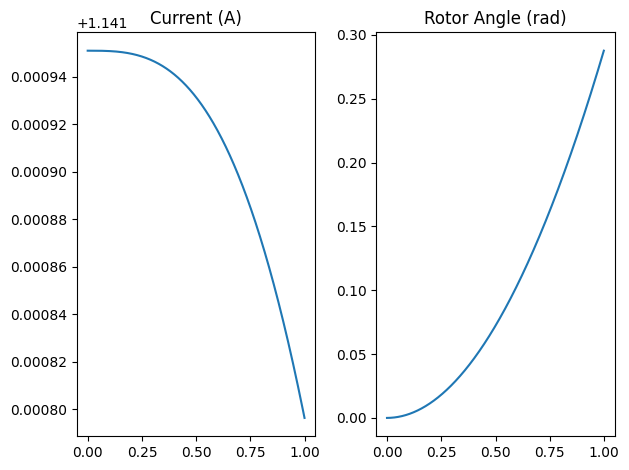

In [17]:
%matplotlib inline

time = np.arange(0,total_steps)*dt

fig,  axs = plt.subplots(1,2)
axs[0].plot(time, currents)
axs[0].set_title('Current (A)')

axs[1].plot(time, angle)
axs[1].set_title('Rotor Angle (rad)')

plt.tight_layout()
plt.show()